C:\Users\orson\AppData\Local\Temp\ipykernel_19332\306976505.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


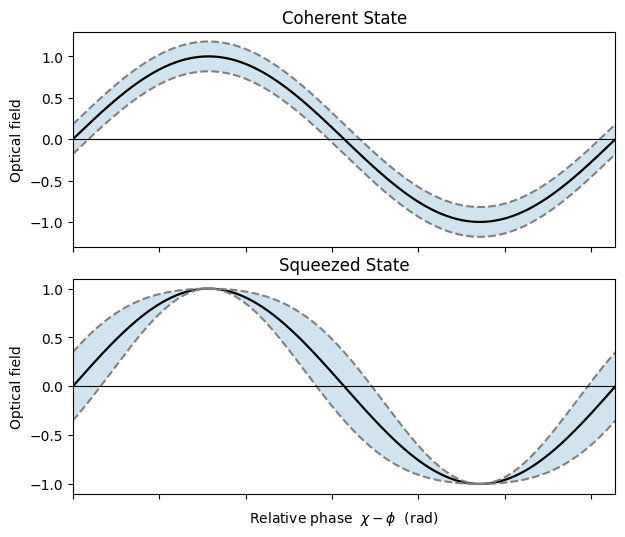

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Profiles for the uncertainty band
# ------------------------------------------------------------------
def delta_coherent(x, sigma=0.18):
    """Constant ±σ."""
    return sigma

def delta_squeezed(x, sigma_max=0.35):
    """Width collapses at peaks (σ ∝ cos²ϕ)."""
    return sigma_max * np.cos(x)**2


def plot_with_uncertainty(ax, x, field, delta, title, show_xlabel=False):
    upper = field + delta
    lower = field - delta

    ax.plot(x, field, color="black", lw=1.6)
    ax.plot(x, upper, ls="--", color="grey")
    ax.plot(x, lower, ls="--", color="grey")
    ax.fill_between(x, lower, upper, alpha=0.20)

    ax.axhline(0, color="black", lw=0.8)
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylabel("Optical field")
    ax.set_title(title, pad=6)
    
    if show_xlabel:
        ax.set_xlabel(r"Relative phase  $\chi - \phi$  (rad)")
    else:
        ax.set_xticklabels([])
        ax.set_xlabel("")


# ------------------------------------------------------------------
# Data for both subplots
# ------------------------------------------------------------------
x = np.linspace(0, 2*np.pi, 2000)
field = np.sin(x)

# Create one figure with two *equal‑sized* subplots
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1,
    sharex=True,
    figsize=(7, 6),                 # equal width; overall height 6 in
    gridspec_kw={"height_ratios": [1, 1], "hspace": 0.15}
)

# Top: coherent state (no x‑axis label)
plot_with_uncertainty(ax1, x, field, delta_coherent(x),
                      "Coherent State",
                      show_xlabel=False)

# Bottom: squeezed state (shared x‑axis label)
plot_with_uncertainty(ax2, x, field, delta_squeezed(x),
                      "Squeezed State",
                      show_xlabel=True)

fig.tight_layout()
plt.show()
